In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

In [41]:
df = pd.read_csv("prediction_dataset.csv",index_col=0)
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df[['wind_dir']]).toarray())
new_names = dict()
for index,x in enumerate(enc.get_feature_names(['wind_dir'])):
    new_names[index] = x

df = df.join(enc_df)
df = df.rename(columns=new_names)

enc_df = pd.DataFrame(enc.fit_transform(df[['clouds']]).toarray())
new_names = dict()
for index,x in enumerate(enc.get_feature_names(['clouds'])):
    new_names[index] = x
df = df.join(enc_df)
df = df.rename(columns=new_names)


Index(['time', 'station', 'temperature', 'wind_dir', 'wind_speed',
       'wind_impact', 'clouds', 'weather', 'wind_dir_BEZV', 'wind_dir_J',
       'wind_dir_JV', 'wind_dir_JZ', 'wind_dir_PREM', 'wind_dir_S',
       'wind_dir_SV', 'wind_dir_SZ', 'wind_dir_V', 'wind_dir_Z',
       'clouds_Jasno', 'clouds_Malá oblačnosť', 'clouds_Oblačno',
       'clouds_Polooblačno', 'clouds_Takmer jasno', 'clouds_Takmer zamračené',
       'clouds_Zamračené'],
      dtype='object')

In [49]:
X = ['wind_speed',
       'wind_impact', 'wind_dir_BEZV', 'wind_dir_J',
       'wind_dir_JV', 'wind_dir_JZ', 'wind_dir_PREM', 'wind_dir_S',
       'wind_dir_SV', 'wind_dir_SZ', 'wind_dir_V', 'wind_dir_Z',
     'clouds_Jasno', 'clouds_Malá oblačnosť', 'clouds_Oblačno',
       'clouds_Polooblačno', 'clouds_Takmer jasno', 'clouds_Takmer zamračené',
       'clouds_Zamračené'
       ]
y = 'temperature'
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2,random_state=22)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5.2817071768237875


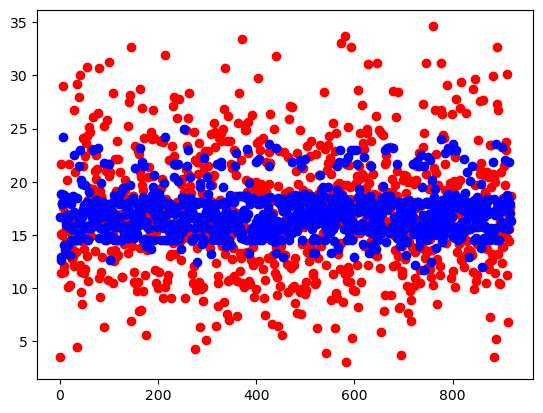

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
x = model.predict(X_test)
mse=mean_squared_error(y_test, x)
print(np.sqrt(mse))
plt.scatter(range(len(y_test)),y_test,color="red")
plt.scatter(range(len(y_test)),x,color="blue")
plt.show()

5.3505161079118855


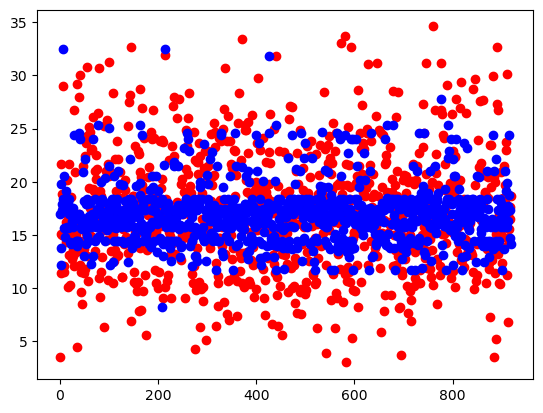

In [81]:
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=22)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))
plt.scatter(range(len(y_test)),y_test,color="red")
plt.scatter(range(len(y_test)),y_pred,color="blue")
plt.show()

In [ ]:
#https://towardsdatascience.com/single-and-multi-step-temperature-time-series-forecasting-for-vilnius-using-lstm-deep-learning-b9719a0009de